In [133]:
# 怎样normalization？
# report？
import numpy as np
import torch
import pandas as pd
from torch.nn import functional as F
from torch import nn, optim
import torchvision
from matplotlib import pyplot as plt
from torch.autograd import Variable
# from python3_utils import plot_image, plot_curve, one_hot

# Load data(do not change)
data = pd.read_csv("src/mnist_train.csv")
train_data = data[:2000]
test_data = data[2000:2500]


# ----- Prepare Data ----- #
# step one: preparing your data including data normalization
train_label = torch.tensor(np.array(train_data.iloc[:,0]))
train_data = torch.tensor(np.array(train_data.iloc[:,1:])/255).reshape(2000,1,28,28)
train_data = torch.tensor(train_data, dtype=torch.float32)       ############ important!


# train_data = torch.utils.data.TensorDataset(train_data, train_label)

test_label = torch.tensor(np.array(test_data.iloc[:,0]))
test_data = torch.tensor(np.array(test_data.iloc[:,1:])/255).reshape(500,1,28,28)
test_data = torch.tensor(test_data, dtype=torch.float32)
# test_data = torch.utils.data.TensorDataset(test_data.reshape(500,1,28,28), test_label)

# step two: transform np array to pytorch tensor


# train_loader =  torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=False)
# test_loader =  torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)


# ----- Build CNN Network ----- #
# Define your model here
class mymodel(torch.nn.Module):
    def __init__(self):
        super(mymodel, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5, 1)
        self.conv2 = nn.Conv2d(10, 50, 5, 1)
        self.max_pool = nn.MaxPool2d(2)
        self.linear1 = nn.Linear(800, 256)
        self.linear2 = nn.Linear(256, 10)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)

        x = x.view(x.size(0), -1)  # make sure inputs are flattened

        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        x = F.log_softmax(x, dim=1)  # preserve batch dim
        return x

# Define our model
model = mymodel()
# Define your learning rate
learning_rate = 0.003
# Define your optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# Define your loss function
criterion = torch.nn.NLLLoss()


# ----- Complete PlotLearningCurve function ----- #
def PlotLearningCurve(epoch, trainingloss, testingloss):
    plt.plot(trainingloss, label='training loss')
    plt.plot(testingloss, label='testing loss')
    plt.legend(loc='best')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xlim((0,50))
    plt.ylim((0,2.0))
    plt.show()
    


# ----- Main Function ----- #
trainingloss = []
testingloss = []
# Define number of iterations
epochs = 100
for epoch in range(1, epochs + 1):
    model.train()
#     for images, labels in train_loader:
    # step one : fit your model by using training data and get predict label
#         images = Variable(images)
#         labels = Variable(labels)
    output = model(train_data)
    # step two: calculate your training loss
    loss = criterion(output, train_label)
    # step three: calculate backpropagation
    loss.backward()
    # step four: update parameters
    optimizer.step()
    # step five: reset our optimizer
    optimizer.zero_grad()
    # step six: store your training loss
    trainingloss += loss.item(),
    # step seven: evaluation your model by using testing data and get the accuracy
    with torch.no_grad():
        model.eval()
        # predict testing data
        test_output = model(test_data)
        # calculate your testing loss
        loss = criterion(test_output, test_label)
        # store your testing loss
        testingloss += loss.item(),
        if epoch % 10 == 0:
            # get labels with max values
            # torch.max(test_output,1) 返回每一行中最大值的那个元素，且返回索引
            pred_y = torch.max(test_output,1)[1]
            # calculate the accuracy
            acc = sum((pred_y==test_label).numpy())/test_label.size(0)
            print('Epoch:', epoch, 'Test Accuracy:', acc)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 10 Test Accuracy: 0.816
Epoch: 20 Test Accuracy: 0.912
Epoch: 30 Test Accuracy: 0.92
Epoch: 40 Test Accuracy: 0.936
Epoch: 50 Test Accuracy: 0.948
Epoch: 60 Test Accuracy: 0.964
Epoch: 70 Test Accuracy: 0.966
Epoch: 80 Test Accuracy: 0.968
Epoch: 90 Test Accuracy: 0.97
Epoch: 100 Test Accuracy: 0.972


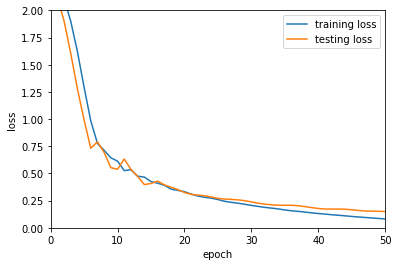

In [134]:
PlotLearningCurve(epoch, trainingloss, testingloss)

In [109]:
xx[1].shape

torch.Size([500])

In [122]:
sum((pred_y==test_label).numpy())/500

0.958

In [128]:
len(testingloss)

100

In [129]:
len(trainingloss)

3200

In [24]:
train_data = data[:2000]
np.array(train_data.iloc[:,0])

array([5, 0, 4, ..., 5, 2, 0])

In [27]:
np.array(train_data.iloc[:,1:])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [2]:
import torch
target = torch.ones([10, 1,64,64], dtype=torch.float32)  # 64 classes, batch size = 10
output = torch.full([10, 64], 0.999)  # A prediction (logit)
>pos_weight = torch.ones([64])  # All weights are equal to criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
>>> criterion(output, target)  # -log(sigmoid(0.999))

SyntaxError: invalid syntax (<ipython-input-2-8b3ee0c8c0f6>, line 3)